## OG-India Output Demonstration
#### August 20, 2019

This notebook illustrates how to visualize and summarize the results of policy simulations from [`OG-India`](https://github.com/TPRU-India/OG-Inida)).  `OG-India` is computationally intensive to run (often taking several hours to compute a solution) and therefore this notebook works with cached results.  The simulaitons here represent the impact of an example simulation TPRU staff was lead through on August 19, 2019.



#### Setup
Before running this notebook, you must open a terminal window and install the `OG-India` (ogindia) package. This package must be cloned and set up in a specific environment. Please follow the instructions in the main [`README.md`](https://github.com/TPRU-India/OG-India/blob/master/README.md).  You will need to use this notebook in that same Python environment.

In [1]:
# imports
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# import OG-India modules
from ogindia import output_plots as op
from ogindia import output_tables as ot
from ogindia import parameter_tables as pt
from ogindia import parameter_plots as pp
# to print matplotlib plots inline
%matplotlib inline

## NOTE: to load the data below, please change the paths to those where you saved your OG-India output.

In [2]:
# Load in OG-India results and parameterizations
# You will need to use your path here
path_results = '/Users/jason.debacker/repos/OG-India/run_examples'
base_ss = pickle.load(open(
    os.path.join(path_results, 'OUTPUT_BASELINE', 'SS', 'SS_vars.pkl'), 'rb'))
base_tpi = pickle.load(open(
    os.path.join(path_results, 'OUTPUT_BASELINE', 'TPI', 'TPI_vars.pkl'), 'rb'))
base_params = pickle.load(open(
    os.path.join(path_results, 'OUTPUT_BASELINE', 'model_params.pkl'), 'rb'))
base_taxfunctions = pickle.load(open(
    os.path.join(path_results, 'OUTPUT_BASELINE', 'TxFuncEst_baseline_example.pkl'), 'rb'))
reform_ss = pickle.load(open(
    os.path.join(path_results, 'OUTPUT_REFORM', 'SS', 'SS_vars.pkl'), 'rb'))
reform_tpi = pickle.load(open(
    os.path.join(path_results, 'OUTPUT_REFORM', 'TPI', 'TPI_vars.pkl'), 'rb'))
reform_params = pickle.load(open(
    os.path.join(path_results, 'OUTPUT_REFORM', 'model_params.pkl'), 'rb'))
reform_taxfunctions = pickle.load(open(
    os.path.join(path_results, 'OUTPUT_REFORM', 'TxFuncEst_policy_example.pkl'), 'rb'))

## Effects of the reform on tax rates

We can start by considering how invidual income tax rates were changed by the new reform.  Recall that the reform increases tax rates on labor income to 70% for those in the top income bracket.

### changes in effective tax rates:

In [4]:
# Table of tax rates:
pt.tax_rate_table(base_taxfunctions, base_params, reform_taxfunctions,
                   reform_params, start_year=2020, rate_type='MTRy',
                  table_format=None)

Year,2020,2021,2022,2023,2024,2025,2026,2027,2028
Year,2020.000000,2021.000000,2022.000000,2023.000000,2024.000000,2025.000000,2026.000000,2027.000000,2028.000000
Baseline Marginal Tax Rates on Capital Income,26.544986,26.577432,26.597903,26.589323,26.575956,26.584361,29.009106,29.087920,29.145127
Reform Marginal Tax Rates on Capital Income,28.495219,28.633481,28.719612,28.748815,28.759465,28.789507,31.348520,31.442734,31.516609
Difference,1.950233,2.056049,2.121710,2.159492,2.183509,2.205146,2.339414,2.354814,2.371482


## Effects of the 70% top marginal tax rates  on macroeconomic aggregates

We begin this illustration by showing the effect of the reform on macroeconomic aggregates.  The OG model gives these aggregates in model units (which equate to units of GDP).  Therefore, it's often useful to look at the effects of the reform policy in terms of the changes relative to the baseline.  

Here are percentage changes in macro aggregates as a result of the reform:

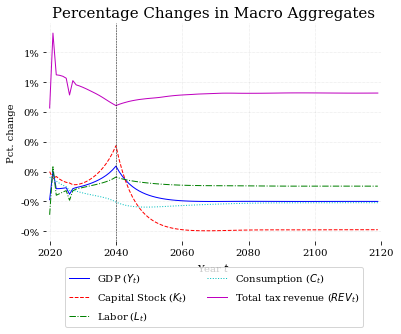

In [10]:
# Plot OG-India output; percentage changes in macro vars (Y, K, L, C)
pct_chg_plot = op.plot_aggregates(base_tpi, base_params, reform_tpi=reform_tpi,
                    reform_params=reform_params,
                    var_list=['Y', 'K', 'L', 'C', 'total_revenue'], plot_type='pct_diff',
                    start_year=2020,
                    num_years_to_plot=100,
                    vertical_line_years=[
                        base_params.start_year + base_params.tG1,
                        base_params.start_year + base_params.tG2],
                    plot_title='Percentage Changes in Macro Aggregates')

### in table format:

In [6]:
# table of output
ot.macro_table(base_tpi, base_params, reform_tpi=reform_tpi,
                    reform_params=reform_params, start_year=2020)

Year,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2020-2029,SS
GDP ($Y_t$),-0.188867,0.003674,-0.114933,-0.114328,-0.111792,-0.108479,-0.152026,-0.114614,-0.107180,-0.102268,-0.001111,-0.200194
Consumption ($C_t$),-0.038375,-0.048245,-0.064138,-0.079014,-0.091449,-0.101600,-0.126637,-0.124488,-0.130881,-0.137451,-0.000942,-0.208909
Capital Stock ($K_t$),0.000000,-0.048725,-0.032846,-0.050793,-0.063794,-0.072194,-0.076620,-0.088135,-0.087878,-0.083866,-0.000602,-0.390173
Labor ($L_t$),-0.290124,0.032172,-0.158852,-0.148285,-0.137405,-0.127803,-0.192412,-0.128682,-0.117394,-0.112004,-0.001382,-0.097748
Real interest rate ($r_t$),-0.336404,0.094053,-0.145778,-0.112697,-0.085028,-0.064198,-0.134734,-0.047062,-0.034178,-0.032509,-0.000897,0.336867
Wage rate,0.101743,-0.028312,0.044154,0.034162,0.025793,0.019485,0.040590,0.014208,0.010342,0.009858,0.000272,-0.102547


# Effect on government debt

We can see above that while the tax change has positive effects on GDP and other economic aggregates over the first few years, the effects of the policy on macro outcomes become negative after 2026.

Part of the reason for this is that several components of the policy are temporary.  E.g., the individual rate cuts and the special deduction for pass-through business owners expire after 2025.

Another issue affecting long run outcomes are the large budget deficits that need to be financed by more government borrowing.  The increase in borrowing increases the demand for loanable funds and pushes up interest rates.  Higher interest rates result in a lower quantity of capital demaned.

We can see this by looking at the path of government debt:

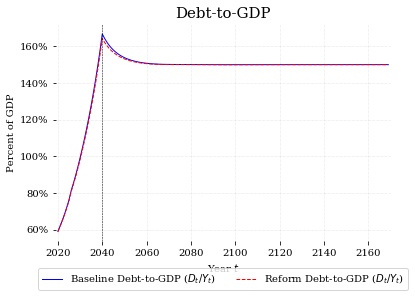

In [8]:
# Plot OG-India output; government debt
dplot = op.plot_gdp_ratio(base_tpi, base_params, reform_tpi, reform_params,
                   var_list=['D'], num_years_to_plot=150,
                   start_year=2020, vertical_line_years=[
                           base_params.start_year + base_params.tG1,
                           base_params.start_year + base_params.tG2],
                   plot_title='Debt-to-GDP')

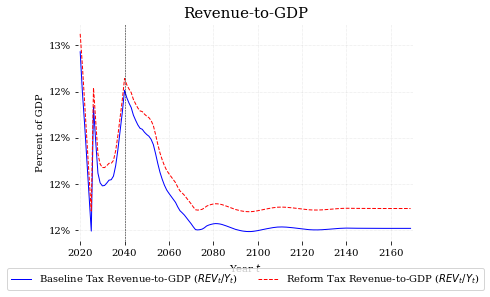

In [11]:
dplot = op.plot_gdp_ratio(base_tpi, base_params, reform_tpi, reform_params,
                   var_list=['total_revenue'], num_years_to_plot=150,
                   start_year=2020, vertical_line_years=[
                           base_params.start_year + base_params.tG1,
                           base_params.start_year + base_params.tG2],
                   plot_title='Revenue-to-GDP')

### we can also look at interest rates:

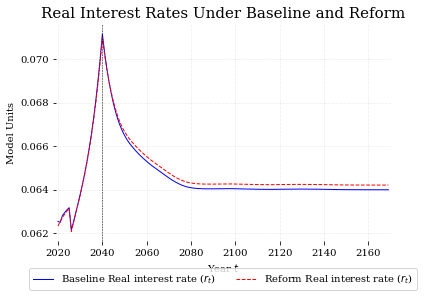

In [12]:
# Plot OG-India output; interest rates
rplot = op.plot_aggregates(
    base_tpi, base_params, reform_tpi=reform_tpi,
    reform_params=reform_params, var_list=['r'],
    plot_type='levels', start_year=2020,
    num_years_to_plot=150,
    vertical_line_years=[
        base_params.start_year + base_params.tG1,
        base_params.start_year + base_params.tG2],
    plot_title='Real Interest Rates Under Baseline and Reform')

### wage rates...

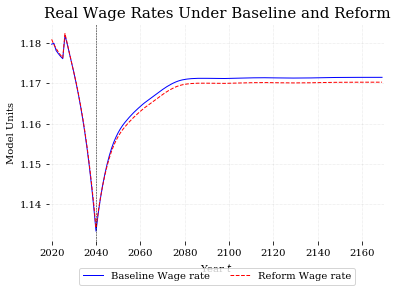

In [13]:
# Plot OG-India output; wage rates
rplot = op.plot_aggregates(
    base_tpi, base_params, reform_tpi=reform_tpi,
    reform_params=reform_params, var_list=['w'],
    plot_type='levels', start_year=2020,
    num_years_to_plot=150,
    vertical_line_years=[
        base_params.start_year + base_params.tG1,
        base_params.start_year + base_params.tG2],
    plot_title='Real Wage Rates Under Baseline and Reform')

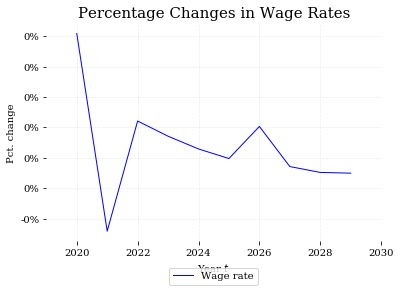

In [14]:
pct_chg_plot = op.plot_aggregates(base_tpi, base_params, reform_tpi=reform_tpi,
                    reform_params=reform_params,
                    var_list=['w'], plot_type='pct_diff',
                    start_year=2020,
                    num_years_to_plot=10,
                    vertical_line_years=[
                        base_params.start_year + base_params.tG1,
                        base_params.start_year + base_params.tG2],
                    plot_title='Percentage Changes in Wage Rates')

## Distributional analysis

Given the heterogenity in the model - differences in households by age and lifetime income group - we can conduct distributional analysis with the model.

Consider the differences in earnings profiles across groups:

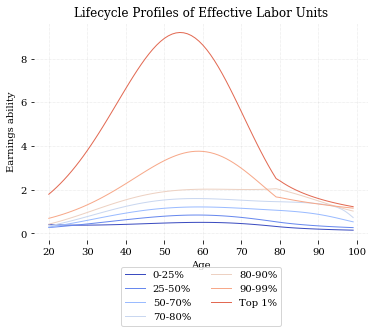

In [15]:
# earnings profiles
fig2 = pp.plot_ability_profiles(base_params, include_title=True)

These differences in earnings mean that the changes in marginal and effective tax rates, which vary by income, are doing to have differential impacts across these groups.

No handles with labels found to put in legend.


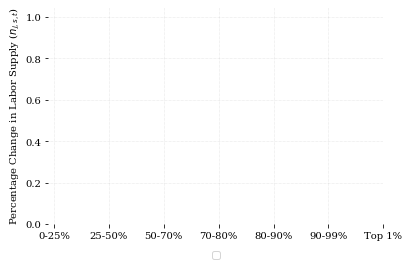

In [17]:
# plot effects by group
bar = op.ability_bar(base_tpi, base_params, reform_tpi,
                reform_params, var='n_mat')

### effects across the lifecycle (SS results):

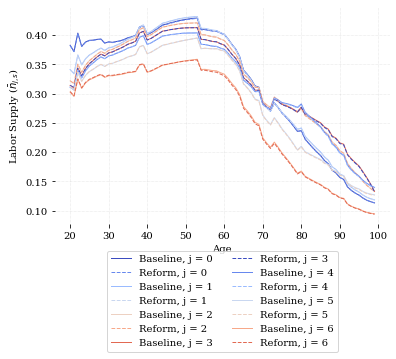

In [18]:
# plot profiles from SS
fig1 = op.ss_profiles(base_ss, base_params, reform_ss, reform_params,
                      var='nssmat')

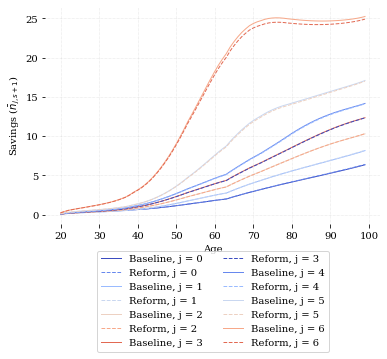

In [19]:
# plot profiles from SS
fig1 = op.ss_profiles(base_ss, base_params, reform_ss, reform_params,
                      var='bssmat_splus1')

In [ ]:
# plot labor profiles from SS along with data
fig1 = op.ss_profiles(base_ss, base_params, by_j=False, var='nssmat', plot_data=True)